In [1]:
curr_dir = f'/user_data/csimmon2/git_repos/ptoc' #CHANGE AS NEEDED CAUSE ITS FOR VLAD

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import ptoc_params as params

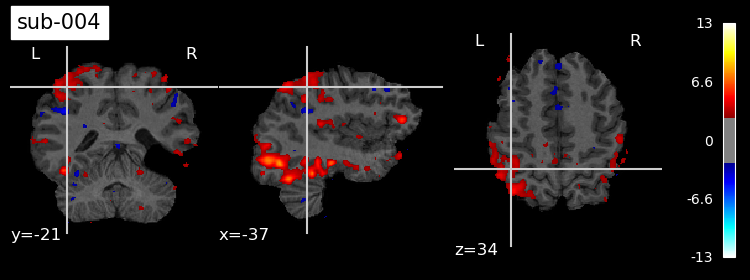

In [3]:
##single subject

data_dir = params.data_dir
raw_dir = params.raw_dir  
sub = 'sub-004'

stats_file = 'derivatives/fsl/loc/HighLevel.gfeat/cope3.feat/stats/zstat1.nii.gz'


anat_dir = f"{raw_dir}/{sub}/ses-01"
anat = image.load_img(f"{anat_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz")

sub_dir = f"{data_dir}/{sub}/ses-01"
func = image.load_img(f"{sub_dir}/{stats_file}")
plotting.plot_stat_map(func,bg_img = anat, threshold = 2.58, title = sub)
plt.show()
plt.pause(0.0001)

File exists.


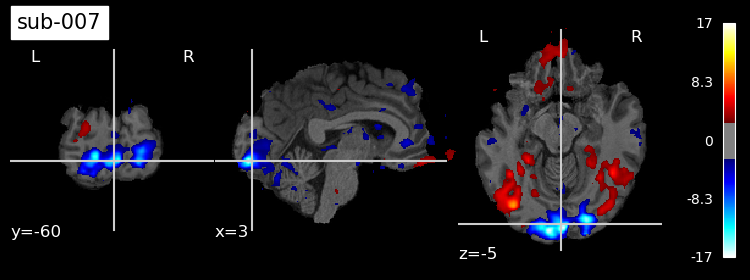

File exists.


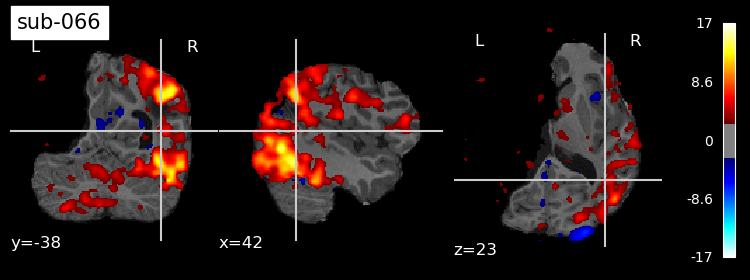

File exists.


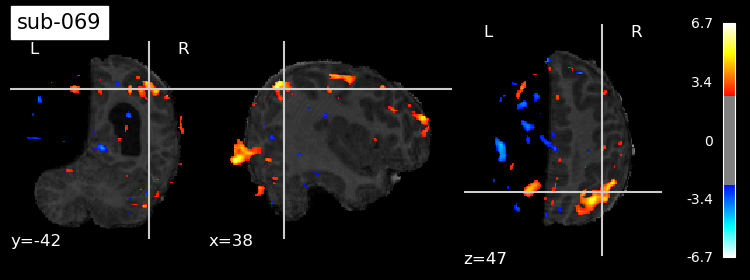

File exists.


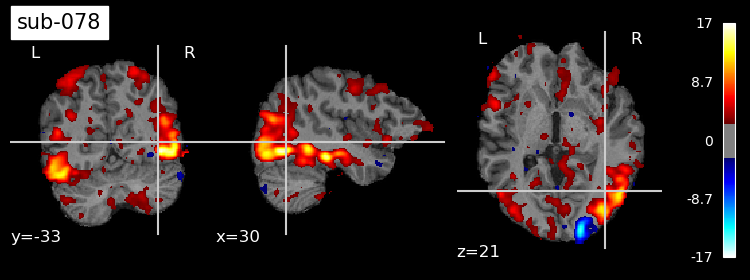

File exists.


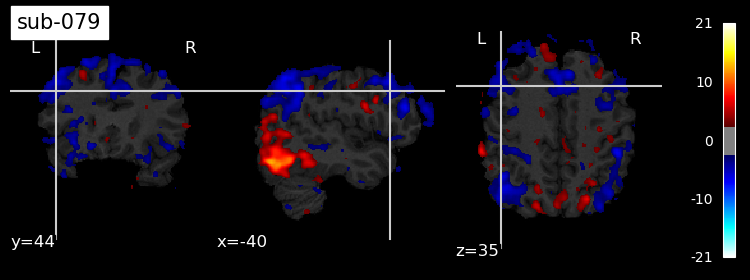

File exists.


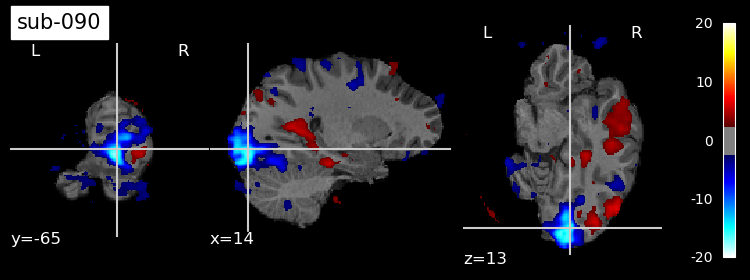

File exists.


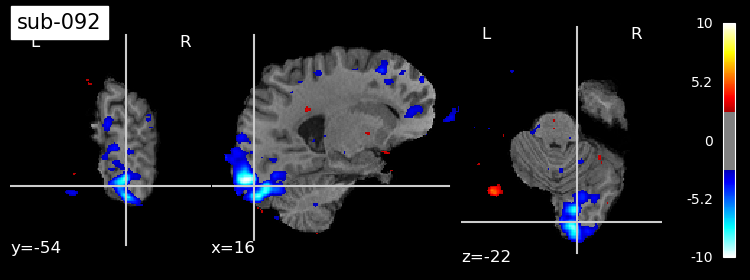

File exists.


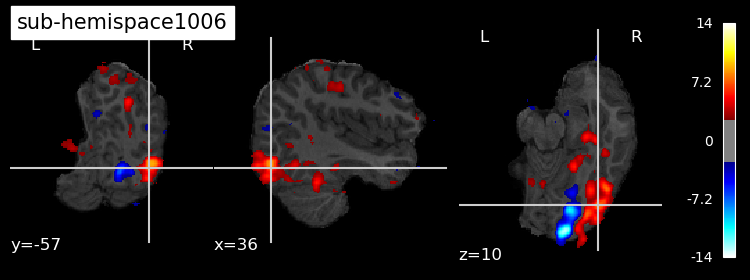

File exists.


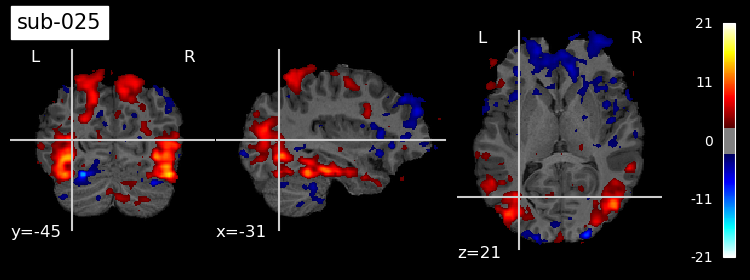

File exists.


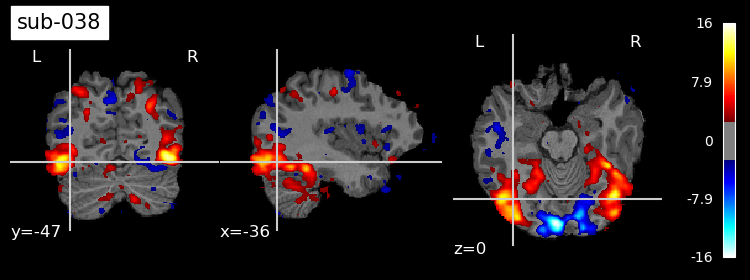

File exists.


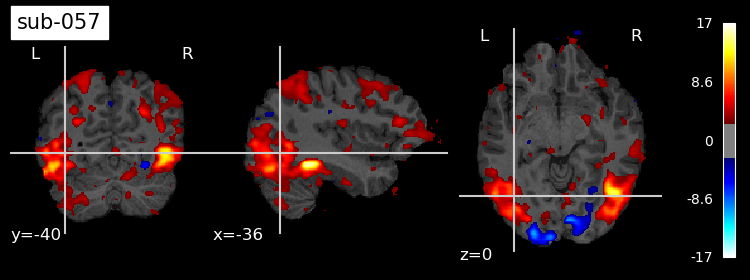

File exists.


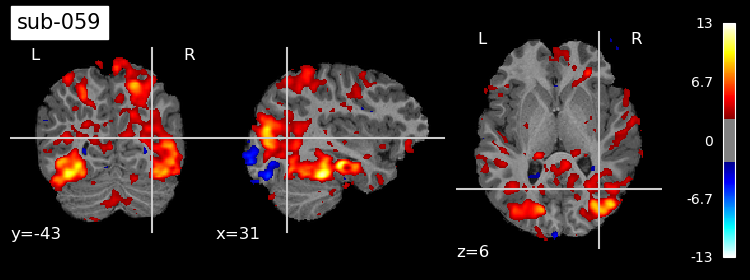

File exists.


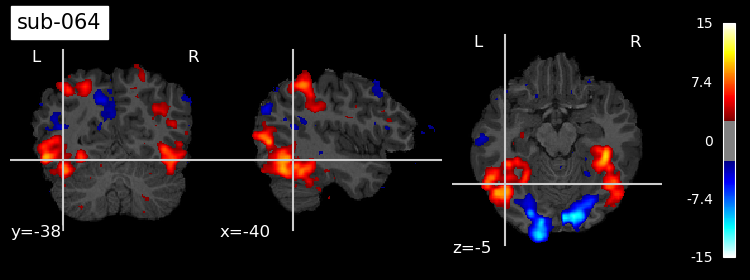

File exists.


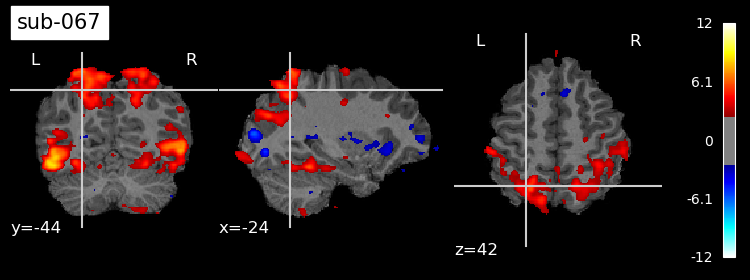

File exists.


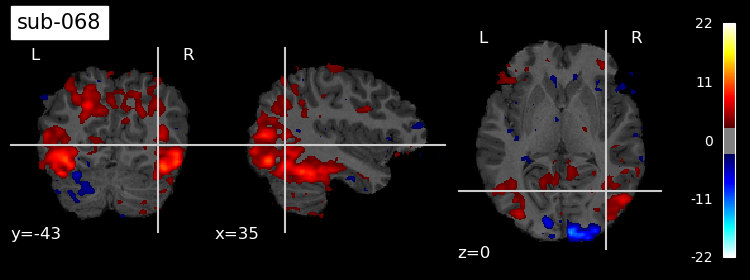

File exists.


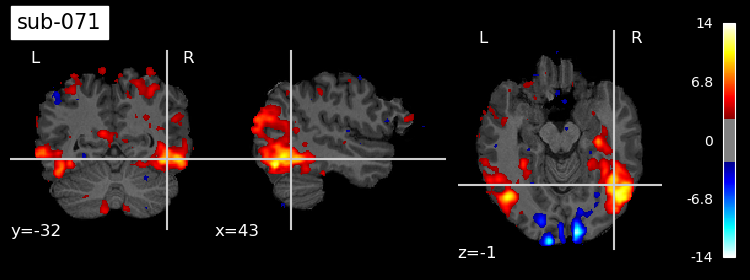

File exists.


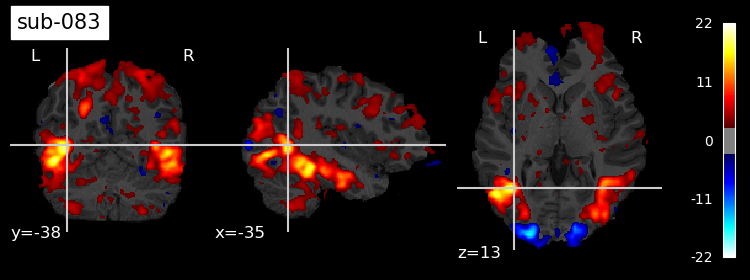

File exists.


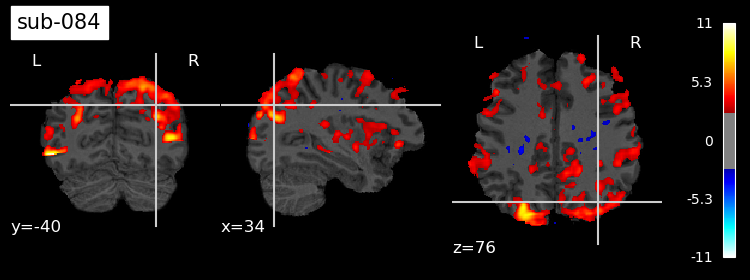

File exists.


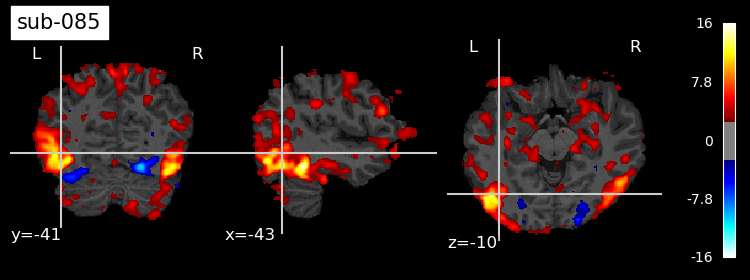

File exists.


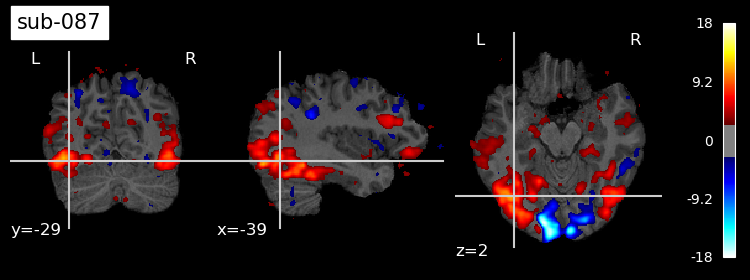

File exists.


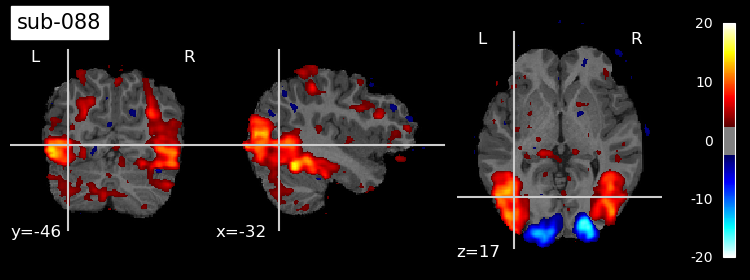

File exists.


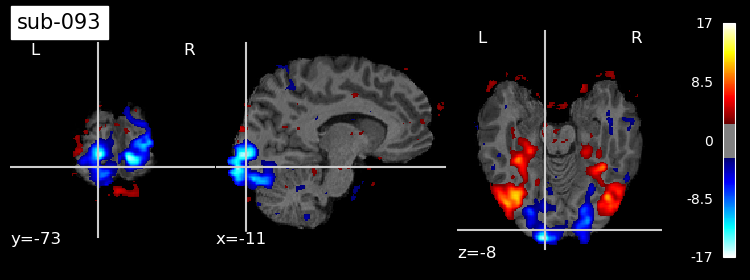

File exists.


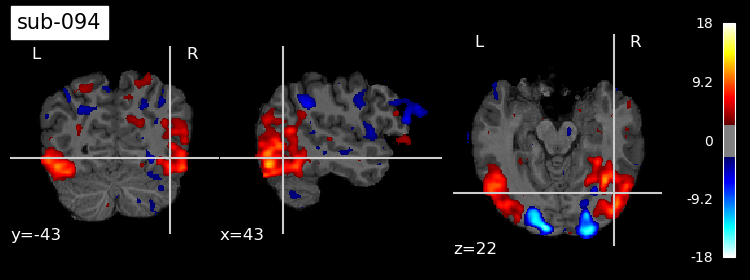

File exists.


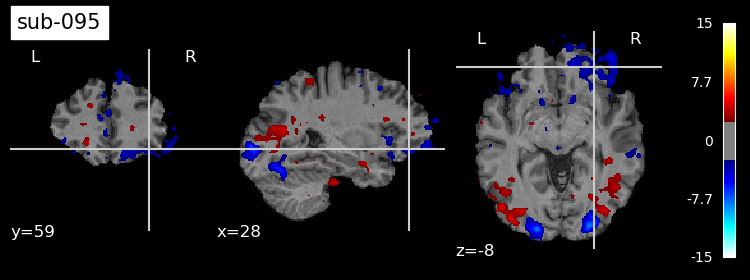

File exists.


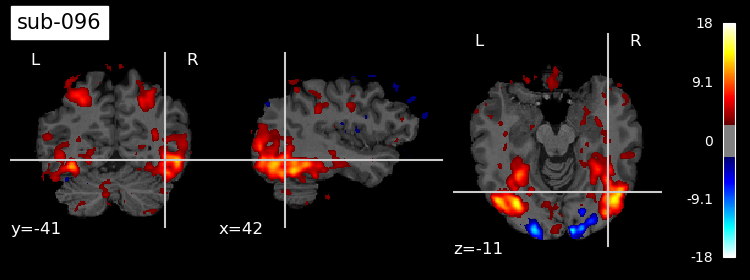

File exists.


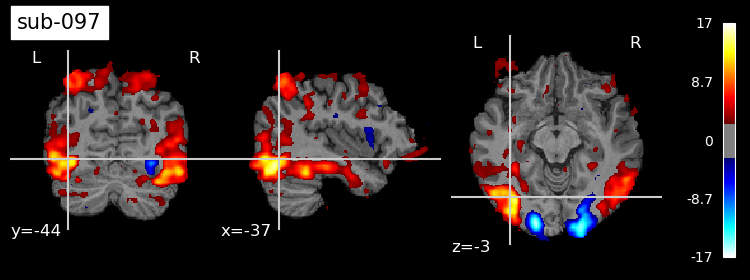

File exists.


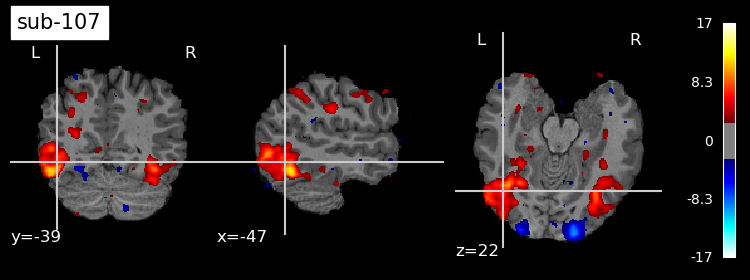

File exists.


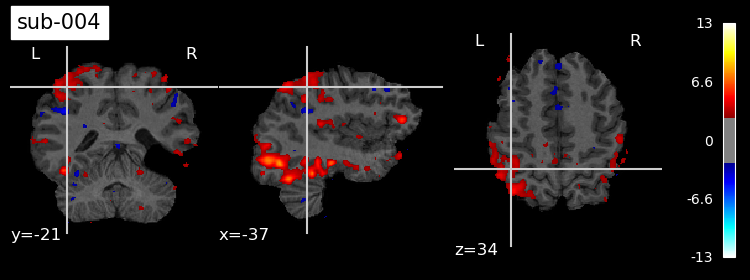

File exists.


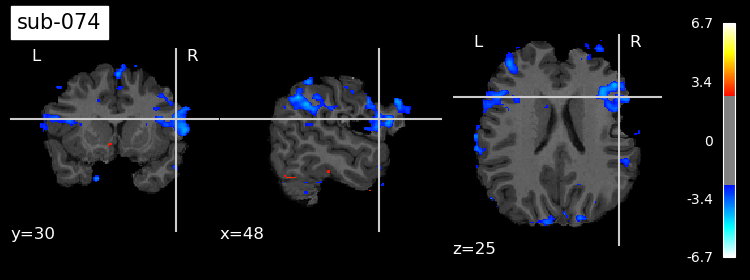

File exists.


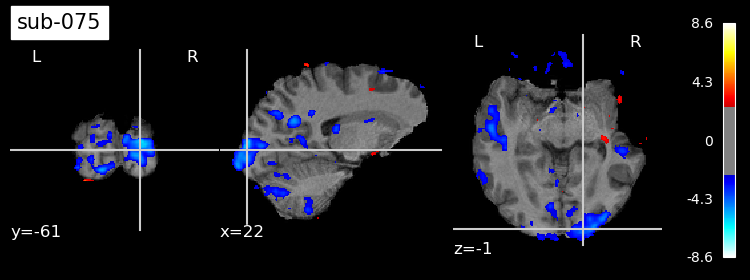

File exists.


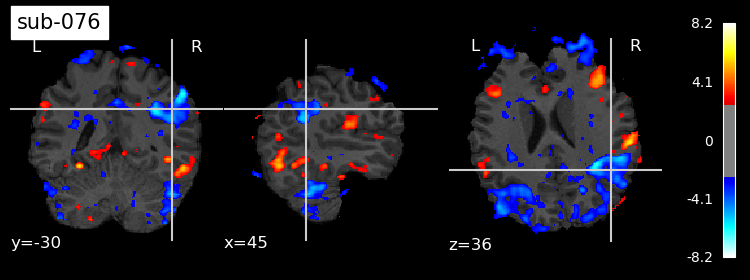

File exists.


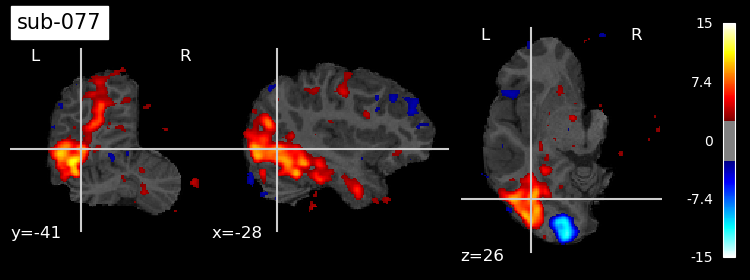

File exists.


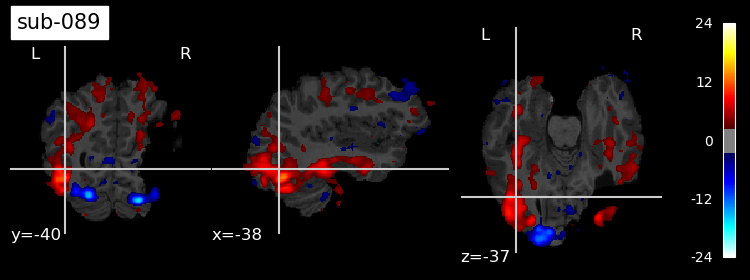

File exists.


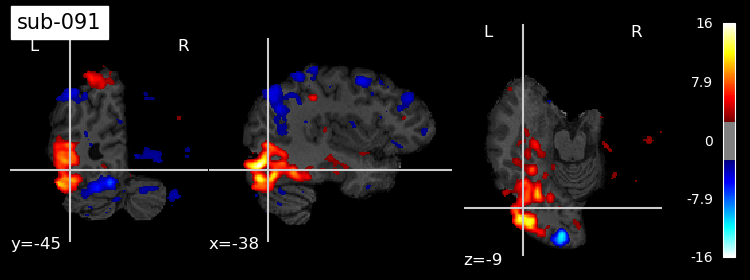

File exists.


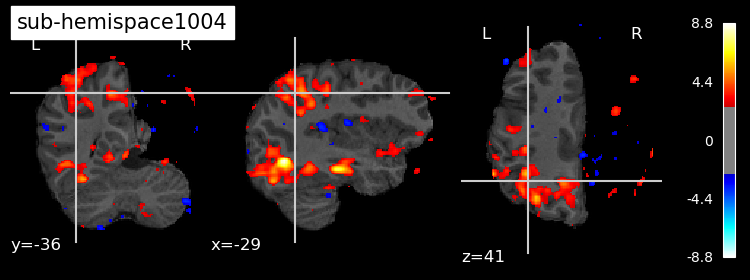

File exists.


In [2]:
##subject loop

data_dir = params.data_dir
raw_dir = params.raw_dir
sub_info = params.sub_info
#sub_info = sub_info.iloc[9:] #I am limiting the subjects to where the break happened this exludes lines above the number listed not including the number listed
stats_file = 'derivatives/fsl/loc/HighLevel.gfeat/cope3.feat/stats/zstat1.nii.gz'

#loop through subs in sub_info
for sub in sub_info['sub']: 
   
    #on each sub set the directory for the anatomical and func
    anat_dir = f"{raw_dir}/{sub}/ses-01"
    anat = image.load_img(f"{anat_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz")
    sub_dir = f"{data_dir}/{sub}/ses-01"
    func = image.load_img(f"{sub_dir}/{stats_file}")
    
    #check if func file exists
    if os.path.exists(f"{sub_dir}/{stats_file}"):
        print("File exists.")
    else:
     print("File does not exist.")
    
    #plot it
    plotting.plot_stat_map(func,bg_img = anat, threshold = 2.58, title = sub)
    plt.show()
    plt.pause(0.0001)

In [33]:
#PLOT MIRROR BRAINS FOR PATIENTS

In [ ]:
#PLOT EACH ROI ON PATIENTS


In [4]:
plotting.view_img(func,bg_img = anat, threshold = 2.58)


/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


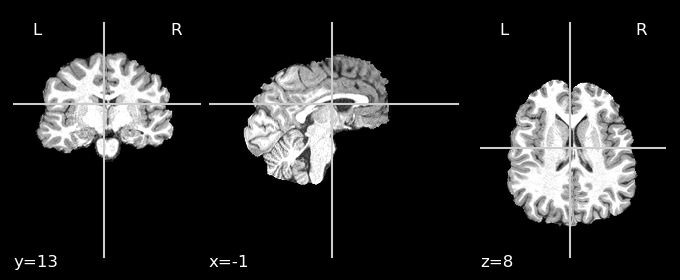

In [5]:
plotting.plot_anat(anat, dim = -1)

In [7]:
data_dir = params.data_dir
results_dir = params.results_dir
fig_dir = params.fig_dir

sub_info = params.sub_info
task_info = params.task_info

suf = params.suf
rois = params.rois
hemis = params.hemis

#load data summary
data_summary = pd.read_csv(f'{results_dir}/hemispace_summary_vals{suf}.csv')

#load subject info
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')

#extract just patients from group
sub_info = sub_info[sub_info['group']=='patient']

#load mni mask
mni = load_mni152_brain_mask()


AttributeError: module 'ptoc_params' has no attribute 'results_dir'

In [ ]:
for task,cond, cope in zip(task_info['task'], task_info['cond'],task_info['cope']):

    for sub, code in zip(sub_info['sub'], sub_info['code']):
        sub_dir = f'{data_dir}/{sub}/ses-01'
    
        
        #register each highlevel to anat
        zstat_path = f'{sub_dir}/derivatives/fsl/{task}/HighLevel.gfeat/cope{cope}.feat/stats/zstat1_reg.nii.gz'

        #check if zstat exists
        if os.path.exists(zstat_path):
            #load zstat
            zstat = image.load_img(zstat_path)
            #zstat = image.clean_img(zstat,mask_img=mni)
            plotting.plot_glass_brain(zstat, threshold = 3.1, draw_cross = False, colorbar = True, title = f'{code} {cond}')
            
            #add title
            plt.title(f'{code} {task}')

            plt.show()
            plt.pause(0.0001)

In [6]:
# create a figure with multiple axes to plot each anatomical image
def plot_glass_brain(subs, exp):
    fig, axes = plt.subplots(nrows=len(all_subs), ncols=1, figsize=(9, 25))


    # axes is a 2 dimensional numpy array
    for axn, ax in enumerate(axes.flatten()):
        display = plotting.plot_glass_brain(all_subs[axn], axes=ax, threshold = 3.1, draw_cross = False, colorbar = True)

        ax.title.set_text(f'Subject {axn + 1}')

    plt.show()
    display.savefig(f'{fig_dir}/{exp}_glassbrain.png')   
    plt.pause(0.0001)

    # save the output figure with all the anatomical images
    #fig.savefig("my_test_img.png")